In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

%matplotlib inline
%run ~/Data/Core.ipynb

Process_All()

#Process_Class_Level()
Table_Character = pd.read_csv('/home/jovyan/Data/Characters.csv')
Table_Class_Level = pd.read_csv('/home/jovyan/Data/Class_Level.csv')
Table_Race = pd.read_csv('/home/jovyan/Data/Race.csv')
Table_Gender = pd.read_csv('/home/jovyan/Data/Gender.csv')
Table_Alignment = pd.read_csv('/home/jovyan/Data/Alignment.csv')

#print(Table_Class_Level)
#print(Table_Race)
#print(Table_Gender)
#print(Table_Alignment)

<IPython.core.display.Javascript object>

In [6]:
#Tab_Info = [['Class/Count',   Table_Class_Level, ["Class", "Sub-Class", "C_Count"]],
            #['Class/Level',   Table_Class_Level, ["Class", "Sub-Class", "L_Count"]],
            #['Race BD; Book',     Table_Race,        ["Source", "Race", "Count"]],
            #['Race/Sub-Race', Table_Race,        ["Race", "Tag3", "Count"]],
            #['Gender',Table_Gender, ["Gender", "Count"]],
            #['Alignment',Table_Alignment, ["Alignment", "Count"]],
           #]

Tab_Info = [
    ['Race/Sub-Race', Return_Treemap(Table_Race, ["Race", "Tag3", "Count"])],
    #['Race/Sub-Race', Return_Treemap(Table_Race, ["Race", "Sub-Race", "Count"])],
    #['Class/Count',   Return_Treemap(Table_Class_Level, ["Class", "Sub-Class", "C_Count"])],
    #['Class/Level',   Return_Treemap(Table_Class_Level, ["Class", "Sub-Class", "L_Count"])],
    ['Class C/L',   Return_Class_Scatter()],
    ['Sub-Class C/L',   Return_Sub_Class_Scatter()],
    ['Sub-Class/Race', Return_SCR_Heatmap()],
    ['Class/Race', Return_CR_Heatmap()],
    ['Gender',        Return_Gender_Sunburst()],
    ['Alignment',     Return_Alignment_Heatmap()],
]

Childs = []

#for TI in Tab_Info:    
    #Childs.append(get_Tab(TI[1], TI[2]))
    
for TI in Tab_Info:
    Childs.append(TI[1])

tab = widgets.Tab(children=Childs)

Counter=0
for TI in Tab_Info:    
    tab.set_title(Counter, TI[0])
    Counter+=1

display(tab)

In [3]:
Table_Character

ID                      Name      Type       Alignment  Gender  \
0      1.0             Talia Winters  Inactive     Lawful Good  Female   
1      2.0               Sylla Salvo  Inactive  Lawful Neutral  Female   
2      3.0                  JD (Jin)    Active    Neutral Evil  GN (F)   
3      4.0        Short Samurai Jack  Inactive    Neutral Good  Female   
4      5.0  Grubby the Christmas Elf      Plan    Chaotic Evil    Male   
..     ...                       ...       ...             ...     ...   
147  136.0         Tall 'Kelp' Green      Plan    Neutral Good  GN (F)   
148  137.0                Esina Kadu      Plan    Neutral Good  GN (F)   
149  138.0   Ozen Agethea Rootwalker    Active    Neutral Good  GN (F)   
150  139.0           Kenna McCormick  Inactive    Neutral Good  GN (N)   
151  140.0                      Nora      Plan    True Neutral  Female   

                   Race                                    Class Breakdown  \
0     EEPC.Genasi.Water                       PHB.Cleric.Tempest Domain: 5   
1          HGtV.Selkies                            HGtV.Rogue.Dreadmask: 1   
2       ERLW.Changeling                      PHB.Rogue.Arcane Trickster: 7   
3    PHB.Halfling.Stout  PHB.Fighter.Battle Master: 5, XGE.Rogue.Swashb...   
4           ERLW.Goblin                                 XGE.Rogue.Scout: 3   
..                  ...                                                ...   
147        TEB.Deepling            HGtV.Monk.Way of the Dancing Current: 7   
148        PHB.Elf.Wood                       XGE.Ranger.Horizon Walker: 3   
149         VGM.Goliath    XGE.Barbarian.Path of the Ancestral Guardian: 3   
150   PHB.Human.Variant                         TCE.Cleric.Order Domain: 1   
151        VRGR.Dhampir                     HB.Sorcerer.Vampiric Origin: 3   

    Links Campaign Type  
0     NaN       Oneshot  
1     NaN  PHP Campaign  
2     NaN      Campaign  
3     NaN       Oneshot  
4     NaN           NaN  
..    ...           ...  
147   NaN       Oneshot  
148   NaN           NaN  
149   NaN      Campaign  
150   NaN       Oneshot  
151   NaN           NaN  

[152 rows x 9 columns]

      Race     Tag3  Count
0  Unknown  Unknown      0
1
        Race       Tag3  Count
1  Aarakocra  Aarakocra      0
2  Aarakocra  Aarakocra      0
3  Aarakocra  Aarakocra      0
3
        Race       Tag3  Count
1  Aarakocra  Aarakocra      0
2  Aarakocra  Aarakocra      0
3  Aarakocra  Aarakocra      0
3
        Race       Tag3  Count
1  Aarakocra  Aarakocra      0
2  Aarakocra  Aarakocra      0
3  Aarakocra  Aarakocra      0
3
      Race               Tag3  Count
4  Aasimar            Aasimar      0
5  Aasimar            Aasimar      3
6  Aasimar            Aasimar      0
7  Aasimar     Aasimar.Fallen      0
8  Aasimar  Aasimar.Protector      0
9  Aasimar    Aasimar.Scourge      0
6
      Race               Tag3  Count
4  Aasimar            Aasimar      0
5  Aasimar            Aasimar      3
6  Aasimar            Aasimar      0
7  Aasimar     Aasimar.Fallen      0
8  Aasimar  Aasimar.Protector      0
9  Aasimar    Aasimar.Scourge      0
6
      Race               Tag3  Count
4  Aasi

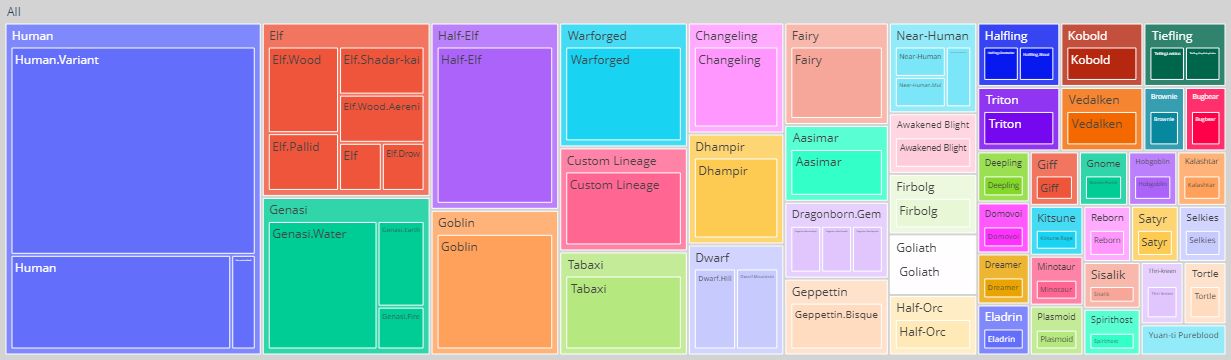

In [23]:
#Return_Treemap(Table_Race, ["Race", "Tag3", "Count"])
Table = Table_Race
Arr = ["Race", "Tag3", "Count"]

MI = 2
Dat = ['All', Arr[0]]

if len(Arr) == 3:
    SF = Table[[Arr[0], Arr[1], Arr[2]]]
    Dat.append(Arr[1])
else:
    SF = Table[[Arr[0], Arr[1]]]
    MI = 1


#for x2, y2 in SF.iterrows():
    #if y2[Arr[0]]=="" or y2[Arr[1]]=="":
        #SF.drop(x2)
  #str(y2[Arr[1]])=="" or
#y2[Arr[0]]=="" or y2[Arr[1]]=="":
#not isinstance(y2[Arr[0]], str) or not isinstance(y2[Arr[1]], str):
#if y2[Arr[0]] is None or y2[Arr[1]] is None:

#print(SF)
#math.isnan (56)

for x2, y2 in SF.iterrows():
    if not isinstance(y2[Arr[1]], str):
        if math.isnan(y2[Arr[1]]):
            #print(str(y2[Arr[0]])+" - "+ str(y2[Arr[1]]))
            SF = SF.drop(x2)


for x1, y1 in SF.iterrows():
    SF2 = SF.query(Arr[0]+'=="'+y1[Arr[1]]+'"')
    if len(SF2)>0:
        print(SF2)
        print(len(SF2))


#for x2, y2 in SF.iterrows():
    #if isinstance(y2[Arr[1]], str):
        #if y2[Arr[1]] == "":
            #print(str(y2[Arr[0]])+" - "+ str(y2[Arr[1]]))
            #SF = SF.drop(x2)

#None

#for x2, y2 in SF.iterrows():
    #if y2[Arr[0]]==null or y2[Arr[1]]==null or y2[Arr[2]]==null:
        #print(x2)
        #SF.drop(y2)

SF["All"] = "All" # in order to have a single root node
fig = px.treemap(SF,
                 path=Dat,
                 values=Arr[MI],
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
#fig.update_layout(autosize=False,width=1100,height=800)
fig.update_layout(autosize=True)  